In [15]:
from src.helpers import *
from src.visualization import *
import pandas as pd
import numpy as np

In [3]:
print(get_converged_decimal())

Tricks converged to 3 decimal places
Cards converged to 2 decimal places


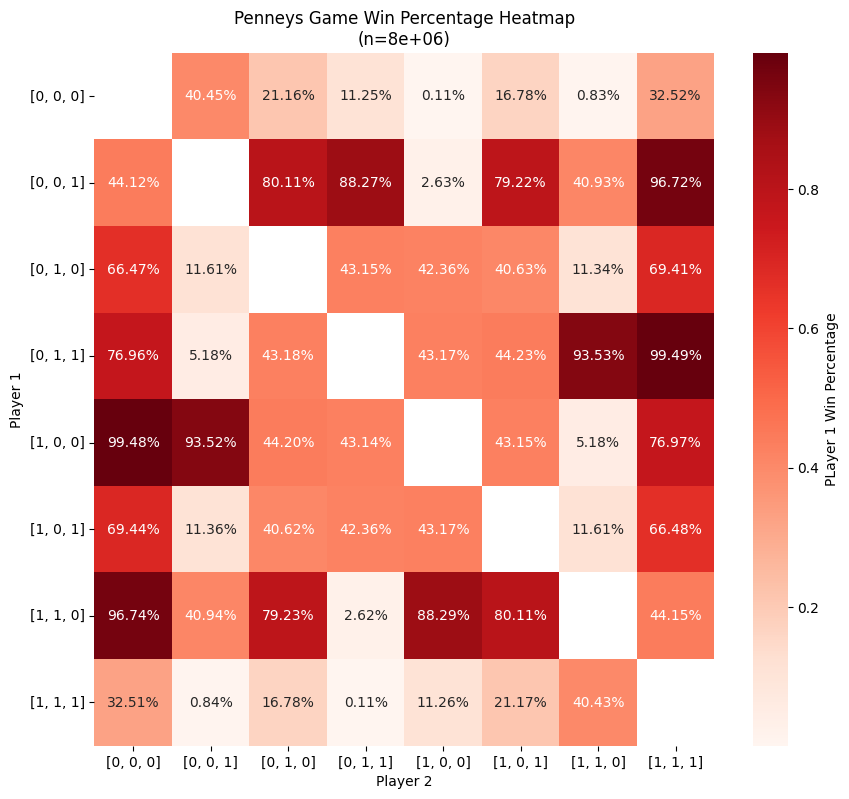

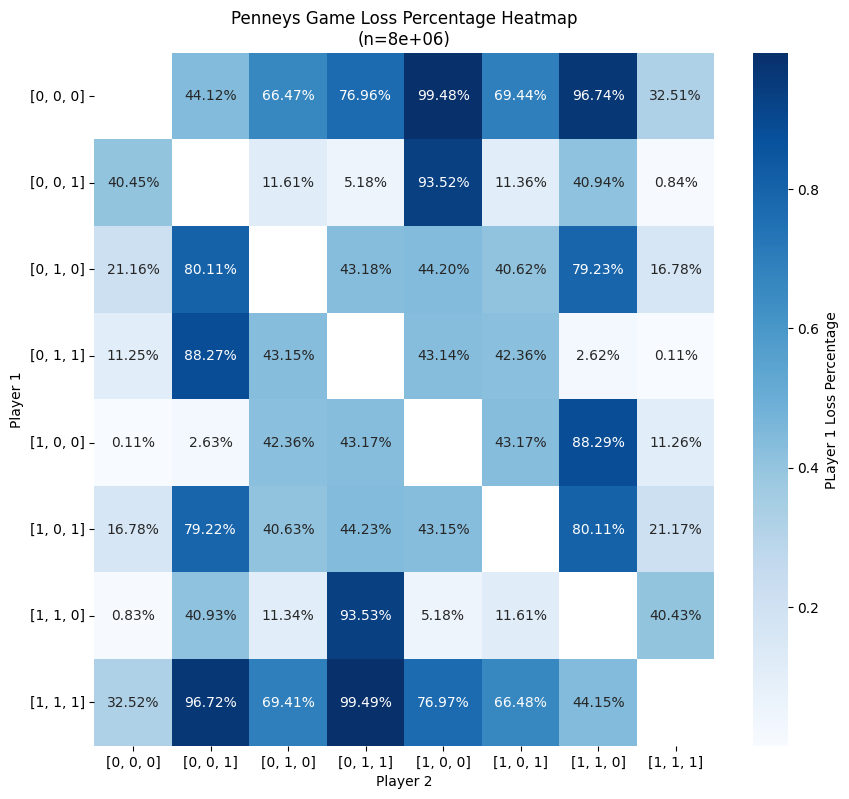

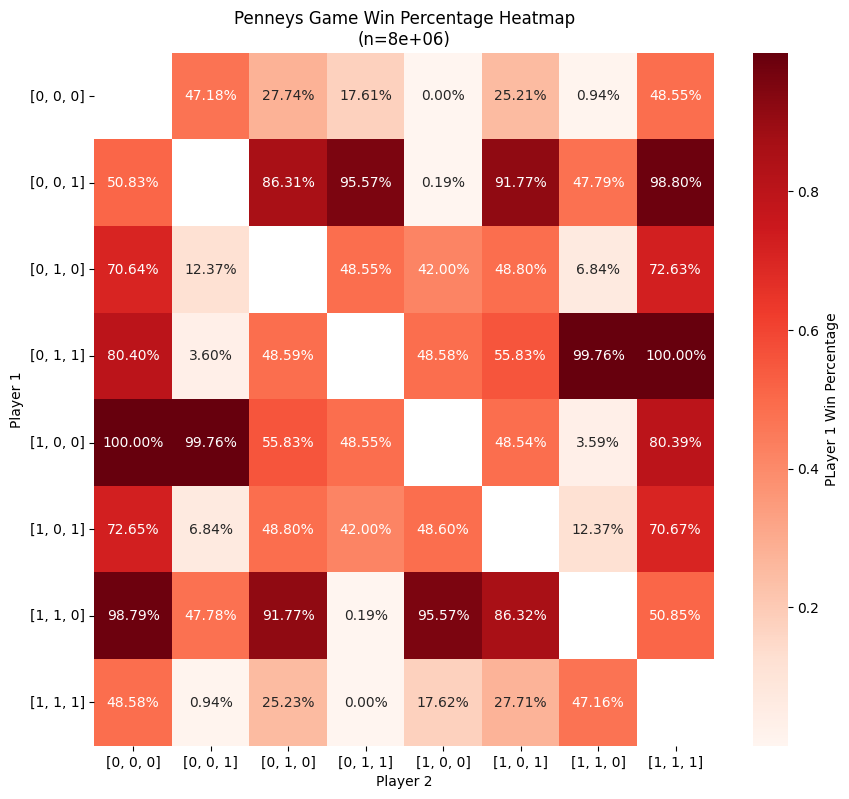

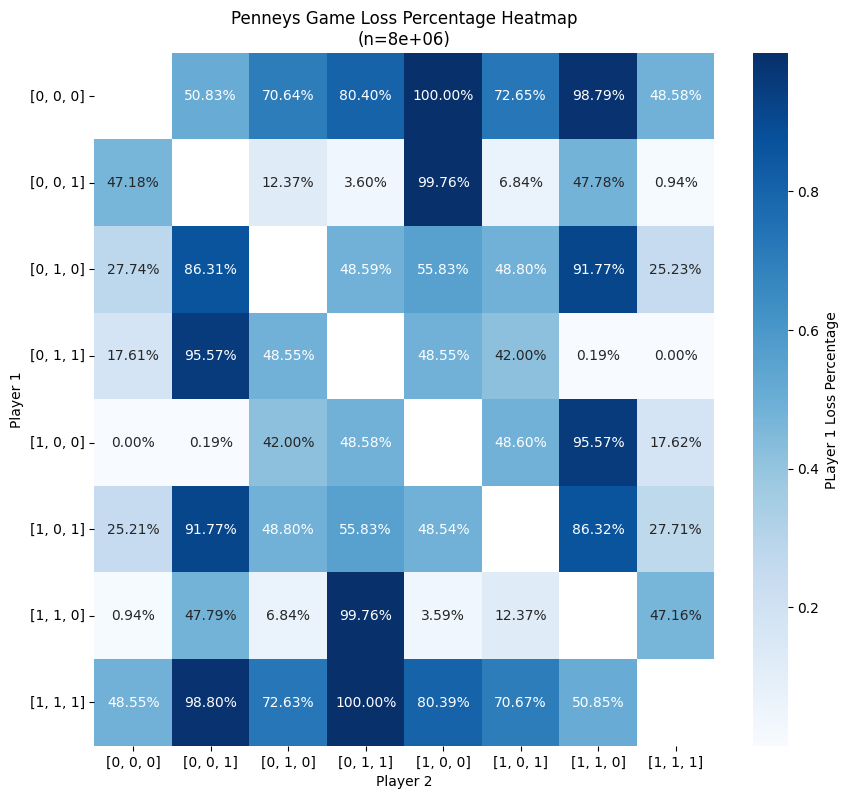

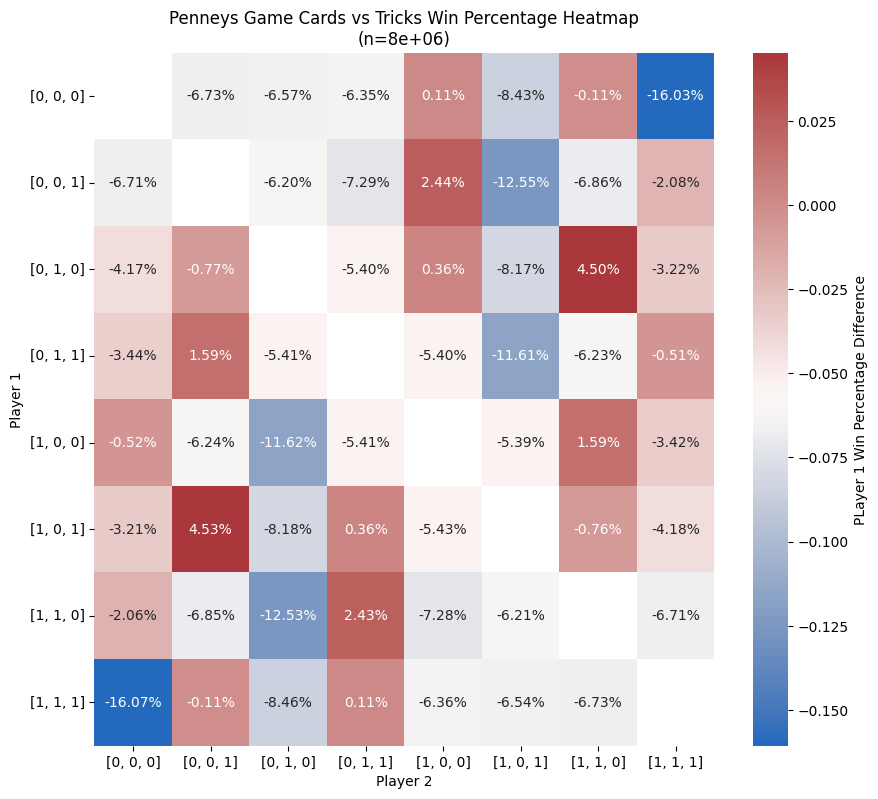

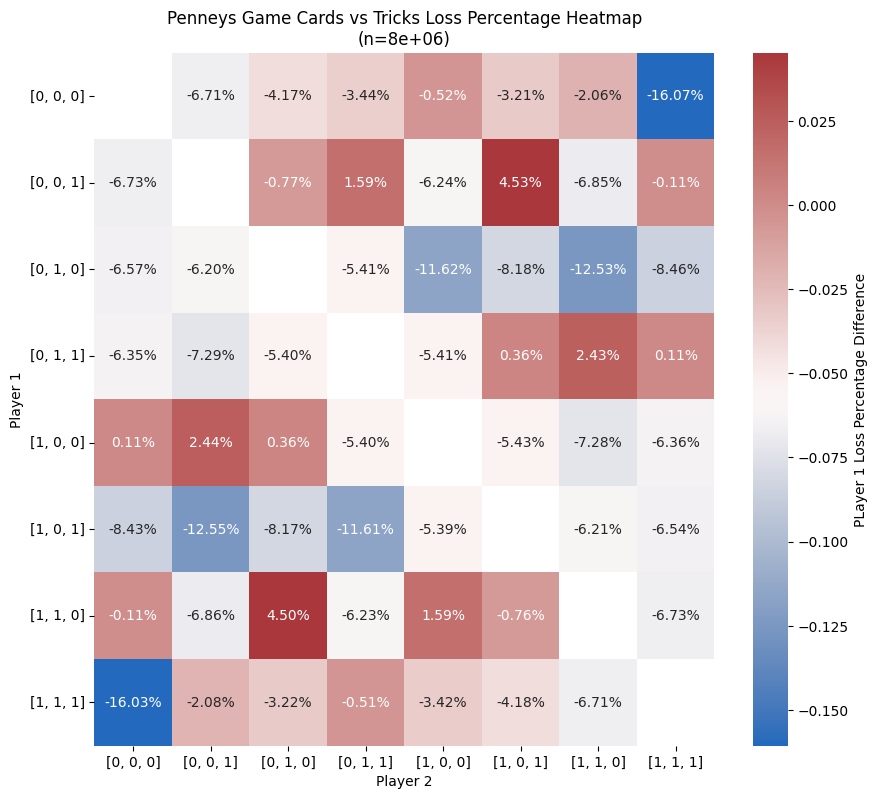

In [4]:
gen_heatmap()

In [5]:
TRICK_WINS, TRICK_LOSSES, TRICK_TIES, CARDS_WINS, CARDS_LOSSES, CARDS_TIES = get_complete_tables()

In [136]:
T_Wins, T_Losses, T_Ties, C_Wins, C_Losses, C_Ties = get_complete_tables()
Total = T_Wins+T_Losses+T_Ties
Total = Total+Total.T

Tricks_winp = T_Wins + T_Losses.T
Tricks_winp = Tricks_winp/Total

Tricks_lossp = T_Losses + T_Wins.T
Tricks_lossp = Tricks_lossp/Total

Tricks_winp = T_Wins + T_Losses.T
Tricks_winp = Tricks_winp/Total

Cards_winp = C_Wins+C_Losses.T
Cards_winp = Cards_winp/Total

Cards_lossp = C_Wins+C_Losses.T
Cards_lossp = Cards_lossp/Total

In [146]:
Cards_lossp

,"[0, 0, 0]","[0, 0, 1]","[0, 1, 0]","[0, 1, 1]","[1, 0, 0]","[1, 0, 1]","[1, 1, 0]","[1, 1, 1]"
"[0, 0, 0]",NaN,0.471759,0.277383,0.176078,0.000010,0.252100,0.009438,0.485543
"[0, 0, 1]",0.508267,NaN,0.863149,0.955675,0.001894,0.917717,0.477882,0.987956
"[0, 1, 0]",0.706447,0.123713,NaN,0.485467,0.420006,0.488045,0.068445,0.726345
"[0, 1, 1]",0.804009,0.035954,0.485864,NaN,0.485776,0.558325,0.997594,0.999985
"[1, 0, 0]",0.999985,0.997620,0.558250,0.485521,NaN,0.485412,0.035924,0.803856
"[1, 0, 1]",0.726545,0.068389,0.487995,0.419965,0.485968,NaN,0.123670,0.706661
"[1, 1, 0]",0.987934,0.477808,0.917661,0.001915,0.955681,0.863166,NaN,0.508538
"[1, 1, 1]",0.485755,0.009441,0.252344,0.000011,0.176203,0.277122,0.471578,NaN


In [24]:
for x in range(len(Tricks_winp)):
    print(Tricks_winp.iloc[x].argmax())

In [58]:
Tricks_lossp.iloc[:,Tricks_lossp.iloc[1].argmin()]

[0, 0, 0]    0.325090
[0, 0, 1]    0.008379
[0, 1, 0]    0.167759
[0, 1, 1]    0.001110
[1, 0, 0]    0.112569
[1, 0, 1]    0.211706
[1, 1, 0]    0.404258
[1, 1, 1]         NaN
Name: [1, 1, 1], dtype: float64

In [144]:
pick_what = pd.DataFrame(data = [[None]*5]*8, columns=['Opponent_Pick','Tricks_WinMax', 'Tricks_LossMin', 'Cards_WinMax','Cards_MinLoss'])
for i, pick in enumerate(Tricks_winp.columns):
    pick_what.loc[i, 'Opponent_Pick'] = pick
    pick_what.loc[i, 'Tricks_WinMax'] = [Tricks_winp.iloc[:,(Tricks_winp.iloc[:,i].argmax())].name, round(Tricks_winp.iloc[:,i].max(),2)]
    pick_what.loc[i, 'Tricks_LossMin'] = [Tricks_lossp.iloc[:,Tricks_lossp.iloc[:,i].argmin()].name, round(Tricks_lossp.iloc[:,i].min(),2)]
    pick_what.loc[i, 'Cards_WinMax'] = [Tricks_winp.iloc[:,(Tricks_winp.iloc[:,i].argmax())].name, round(Tricks_winp.iloc[:,i].max(),2)]
    pick_what.loc[i, 'Cards_MinLoss'] = [Tricks_lossp.iloc[:,Cards_lossp.iloc[:,i].argmin()].name, round(Cards_lossp.iloc[:,i].min(),2)]

In [147]:
pick_what

,Opponent_Pick,Tricks_WinMax,Tricks_LossMin,Cards_WinMax,Cards_MinLoss
0,"[0, 0, 0]","[[1, 0, 0], 0.99]","[[1, 0, 0], 0.0]","[[1, 0, 0], 0.99]","[[1, 1, 1], 0.49]"
1,"[0, 0, 1]","[[1, 0, 0], 0.94]","[[1, 0, 0], 0.03]","[[1, 0, 0], 0.94]","[[1, 1, 1], 0.01]"
2,"[0, 1, 0]","[[0, 0, 1], 0.8]","[[1, 1, 0], 0.11]","[[0, 0, 1], 0.8]","[[1, 1, 1], 0.25]"
3,"[0, 1, 1]","[[0, 0, 1], 0.88]","[[0, 0, 1], 0.05]","[[0, 0, 1], 0.88]","[[1, 1, 1], 0.0]"
4,"[1, 0, 0]","[[1, 1, 0], 0.88]","[[1, 1, 0], 0.05]","[[1, 1, 0], 0.88]","[[0, 0, 0], 0.0]"
5,"[1, 0, 1]","[[1, 1, 0], 0.8]","[[0, 0, 1], 0.11]","[[1, 1, 0], 0.8]","[[0, 0, 0], 0.25]"
6,"[1, 1, 0]","[[0, 1, 1], 0.94]","[[0, 1, 1], 0.03]","[[0, 1, 1], 0.94]","[[0, 0, 0], 0.01]"
7,"[1, 1, 1]","[[0, 1, 1], 0.99]","[[0, 1, 1], 0.0]","[[0, 1, 1], 0.99]","[[0, 0, 0], 0.49]"


NameError: name 'Cards_lossp' is not defined

In [110]:
{Tricks_winp.iloc[:,(Tricks_winp.iloc[0].argmax())].name, Tricks_winp.iloc[1].max()}

{np.float64(0.9671671958201045), '[1, 1, 1]'}

In [132]:
Tricks_winp.iloc[:1]

,"[0, 0, 0]","[0, 0, 1]","[0, 1, 0]","[0, 1, 1]","[1, 0, 0]","[1, 0, 1]","[1, 1, 0]","[1, 1, 1]"
"[0, 0, 0]",NaN,0.404458,0.211646,0.112528,0.001141,0.167827,0.008326,0.325194


In [123]:
Tricks_winp

,"[0, 0, 0]","[0, 0, 1]","[0, 1, 0]","[0, 1, 1]","[1, 0, 0]","[1, 0, 1]","[1, 1, 0]","[1, 1, 1]"
"[0, 0, 0]",NaN,0.404458,0.211646,0.112528,0.001141,0.167827,0.008326,0.325194
"[0, 0, 1]",0.441164,NaN,0.801136,0.882746,0.026267,0.792212,0.409324,0.967167
"[0, 1, 0]",0.664728,0.116062,NaN,0.431454,0.423631,0.406318,0.113402,0.694125
"[0, 1, 1]",0.769601,0.051817,0.431776,NaN,0.431744,0.442256,0.935326,0.994855
"[1, 0, 0]",0.994828,0.935239,0.442010,0.431373,NaN,0.431489,0.051800,0.769690
"[1, 0, 1]",0.694413,0.113643,0.406163,0.423590,0.431691,NaN,0.116056,0.664840
"[1, 1, 0]",0.967368,0.409351,0.792313,0.026214,0.882873,0.801072,NaN,0.441466
"[1, 1, 1]",0.325090,0.008379,0.167759,0.001110,0.112569,0.211706,0.404258,NaN


In [115]:
pick_what['Opponent_Pick'][[1]]

1    None
Name: Opponent_Pick, dtype: object

In [116]:
Tricks_winp.columns[1]

'[0, 0, 1]'

In [1]:
import os
import numpy as np

In [12]:
# deck_lengths = np.array([0])
path = 'src/Decks/loaded/'

# for file in os.listdir(path): 
#     deck_lengths = np.append(deck_lengths, (len(np.load(path+file))))
#     print(path+file)
#     print(deck_lengths)

In [28]:
len(deck_lengths)

16

In [21]:
np.save('src/deck_lengths.npy', deck_lengths)

In [22]:
np.load('src/deck_lengths.npy')

array([      0,     100,     100, 1000000, 1000000, 1000000, 1000000,
       1000000,  900000, 2000000,  100000,       1,     100,     100,
             1])

In [18]:
deck_lengths

array([      0, 1000000, 1000000, 1000000, 1000000, 2000000,  100000,
        900000, 1000000,     100,     100,     100,       1,     100,
             1,     115])

In [3]:
(np.load('src/Decks/seeds+num_cards/deck_lengths.npy'))

array([      0, 1000000, 1000000, 1000000, 1000000, 2000000,  100000,
        900000, 1000000,     100,     100,     100,       1,     100,
             1,     115,     202])

In [2]:
(np.load('src/Decks/seeds+num_cards/used_seeds.npy'))

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [15]:
deck_lengths = np.array([0])
for i in np.load('src/used_seeds.npy')[1:]:
    deck_lengths = np.append(deck_lengths, (len(np.load(path+f'seed_{i}.npy'))))

In [13]:
len(np.load(path+f'seed_{14}.npy'))

115